# Quality Assesment Analytics
## Overview
The primary object here is to assess the production lines and keep them in check over the time to meet the industrial standards. The organisation keeps track of every move of the production lines for instance, the timings, quantity of beverages, etc. Recently you are tasked with checking if different production lines are pouring the right amount of beverages with proper carbonation in a predefined time. 

## Step 1) Problem statement
* Objective: To explore the assessment data and provide relevant insights. By transforming these insights into practical strategies, the company can make significant strides in improving the assembly lines and therefore the production.
* Problem statement: To reiterate, the company aims to optimise the workings of production lines. To accomplish this goal, you need to understand extremes, patterns and associations with applications of probability and distributions.

## Step 2) Formalization of the problem
In order to achieve this goal, we need to understand what success looks like in a clear and measurable way. Let's break down the main goals for the company using the questions provided.

* Understand the distributions and patterns within the assessment data.
* Analyse if there extremes within the data.
* Answering key questions related to probability and distributions of the data.
* Provide key observations based on associations involved within the data.

### Import nesseccery modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Step 3) Data collection and processing
link: https://docs.google.com/spreadsheets/d/1mPhq0fdXLw0ABGj1h2fXBm9D7j4O6Bxe7XfVwIAeXgU/edit#gid=311015147
We downloaded the data with csv format and save in this file named Quality Assesment.csv

In [2]:
data = pd.read_csv('Quality Assesment.csv')
data.head()

,Id,Assembly Line,Quantity (lts.),CO2 dissolved,Time limit Crossed
0,1263945,B,1.971072,14.401617,0
1,1828129,B,2.073388,14.137750,0
2,1871804,A,2.019492,14.774384,0
3,1128634,A,2.004422,15.130565,0
4,1848595,B,2.025784,15.756478,0


#### Data Frame Overview
* Id: Product Id (this is system generated while collecting sample)
* Assembly line: There are 2 different assembly lines A and B used for production of beverages.
* Quantity (lts.): The amount of beverage filled in the bottle.
* CO2 dissolved: Amount of CO2 for carbonation in gms.
* Time limit Crossed: If the time limit has crossed to process the bottle (fill & packaging).

### Q1. How many features have missing values?

In [3]:
print('Quick info of data:\n')
print(data.info())

missing_features = []
for feature in data:
    if data[feature].isnull().sum() > 0:
        missing_features.append(feature)

print(f'\n\nTotal features with missing values: {len(missing_features)}')
print(f'\nName of the feature with missing values:\n{missing_features}')

Quick info of data:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Id                  299 non-null    int64  
 1   Assembly Line       299 non-null    object 
 2   Quantity (lts.)     293 non-null    float64
 3   CO2 dissolved       299 non-null    float64
 4   Time limit Crossed  299 non-null    int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 11.8+ KB
None


Total features with missing values: 1

Name of the feature with missing values:
['Quantity (lts.)']


### Q2. Are there any duplicates in the dataset?

In [4]:
if data.duplicated().sum() > 0:
    print('There are duplicated values in the dataset')
else:
    print('There are no duplicates in the dataset')

There are no duplicates in the dataset


### Q3. What is the median for the quantity feature? 
Round it off to 3 decimal places.

In [5]:
quantity_median = round(data['Quantity (lts.)'].median(), 3)
print(f'Median of the quantity feature is: {quantity_median}')

Median of the quantity feature is: 1.998


### Q4. What is the range of CO2 dissolved feature? 
Please round it off to 2 decimal places.

In [6]:
co2_min = round(data['CO2 dissolved'].min(), 2)
co2_max = round(data['CO2 dissolved'].max(), 2)
co2_range = co2_max - co2_min

print('The range of CO2 dissolved feature is:', co2_range)

The range of CO2 dissolved feature is: 147.93


** Its correct answer. But in LMS its wrong. LMS ans is 147.98

### Q5. Is there any outliers in the CO2 dissolved feature?

In [7]:
q1 = data['CO2 dissolved'].quantile(0.25)
q3 = data['CO2 dissolved'].quantile(0.75)
iqr = q3 - q1

lower = q1 - 1.5*iqr
upper = q3 + 1.5*iqr

outliers = data[(data['CO2 dissolved'] < lower) | (data['CO2 dissolved'] > upper)]

if len(outliers) > 0:
    print(f'There are {len(outliers)} outliers in CO2 dissolved feature.\n')
    print(outliers)
else:
    print('There is no outlier in CO2 dissolve feature.')

There are 6 outliers in CO2 dissolved feature.

         Id Assembly Line  Quantity (lts.)  CO2 dissolved  Time limit Crossed
24  1162457             a         1.982551     120.107529                   0
37  1299891             B              NaN     120.502889                   0
60  1782778             B         1.923756       2.253454                   0
65  1446181             A         2.034007     130.179771                   0
85  1711343             A         2.026532     150.180978                   0
86  1301623             B         1.986128     140.233368                   0


### Q6. What is the cardinality of the Assembly line feature in the dataset?

In [8]:
assembly_card = data['Assembly Line'].nunique()
print('Cardinality of Assembly line feature is:', assembly_card)

Cardinality of Assembly line feature is: 4


### Q7. Choose the correct variable type for Time limit crossed.

In [9]:
print('Time limit Crossed feature is discrete quantitative data')
print('\nCasue: A discrete variable is one that can only take on specific, separate values \
(e.g., integers) within a finite or countably infinite range. In this case, \
"Time limit crossed" is a binary variable, indicating whether the time limit was crossed (1) or not (0). \
It takes on discrete values of either 0 or 1, making it a discrete variable. ')

Time limit Crossed feature is discrete quantitative data

Casue: A discrete variable is one that can only take on specific, separate values (e.g., integers) within a finite or countably infinite range. In this case, "Time limit crossed" is a binary variable, indicating whether the time limit was crossed (1) or not (0). It takes on discrete values of either 0 or 1, making it a discrete variable. 


### Q8. Choose the correct variable type for Assembly Line.


In [10]:
print('Assembly line variable is nominal categorical data')
print('\nCause: Nominal categorical data represents categories that do not have an inherent order or ranking. \
In this case, the assembly lines are labeled as "A" and "B," but there is no intrinsic order or \
hierarchy between them. ')

Assembly line variable is nominal categorical data

Cause: Nominal categorical data represents categories that do not have an inherent order or ranking. In this case, the assembly lines are labeled as "A" and "B," but there is no intrinsic order or hierarchy between them. 


## Data Cleaning
Here are some data cleaning tasks for the given dataset. Please perform the following:

* Standardise the Assembly Line column: Make the column consistent so that it has cardinality of 2. [Hint: Use ‘B’ in place of ‘b’ and ‘A’ in place of ‘a’]
* Remove any empty or incomplete rows: Check if there are any rows with missing data. Substitute these values with the mean of numerical or mode for non-numerical data with respect to individual assembly lines.
* Check for Outliers: Check for outliers in the dataset and does it make logical sense to keep them or should we treat them?
[outliers detection will be done later]

#### Standardise Assembly line column

In [11]:
assembly_unique = data['Assembly Line'].unique()
print(f'Unique value of Assembly line feature before satandardise is: {len(assembly_unique)}')
print('Unique values:', assembly_unique)

# Standardise with replace function
data['Assembly Line'] = data['Assembly Line'].replace({'b': 'B', 'a': 'A'})

# Print new result
assembly_unique_new = data['Assembly Line'].unique()
print(f'\n\nUnique value of Assembly line feature before satandardise is: {len(assembly_unique_new)}')
print('Unique values:', assembly_unique_new)

Unique value of Assembly line feature before satandardise is: 4
Unique values: ['B' 'A' 'b' 'a']


Unique value of Assembly line feature before satandardise is: 2
Unique values: ['B' 'A']


#### Remove any empty or incomplete rows

In [12]:
print(f'Missing values before Treatment:\n{data.isnull().sum()}\n')

# Treatment with mean if data type is int or mode if data type object
missing_cols = []

for col in data:
    if data[col].isnull().sum() > 0:  # Check for missing values in each column individually
        missing_cols.append(col)

for col in missing_cols:
    if data[col].dtype == 'object':  # Check data type
        data[col] = data[col].fillna(data[col].mode()[0])  # Fill missing values with mode for object type columns
    else:
        data[col] = data[col].fillna(data[col].mean())  # Fill missing values with mean for numerical columns
        
print(f'Missing values after Treatment:\n{data.isnull().sum()}')


Missing values before Treatment:
Id                    0
Assembly Line         0
Quantity (lts.)       6
CO2 dissolved         0
Time limit Crossed    0
dtype: int64

Missing values after Treatment:
Id                    0
Assembly Line         0
Quantity (lts.)       0
CO2 dissolved         0
Time limit Crossed    0
dtype: int64


## Step 4) Data Analysis
### Part 1) Understanding the distributions and patterns within the assessment data.
One of the primary objectives here is to understand the distributions and patterns within the data. We want to see what impact if our assembly lines are working fine or not. What are possible issues that could occur within the assembly lines? Using this exercise, we should be able to do the maintenance work in a timely manner to further optimise the production.

### Q1. Calculate the total numbers of time limits crossed in the given records?

In [13]:
crossed = data['Time limit Crossed'].sum()
print('Total numbers of time limits crossed in the given records is:', crossed)

Total numbers of time limits crossed in the given records is: 54


### Q2. Please select the correct distribution plots for Quantity in litres.

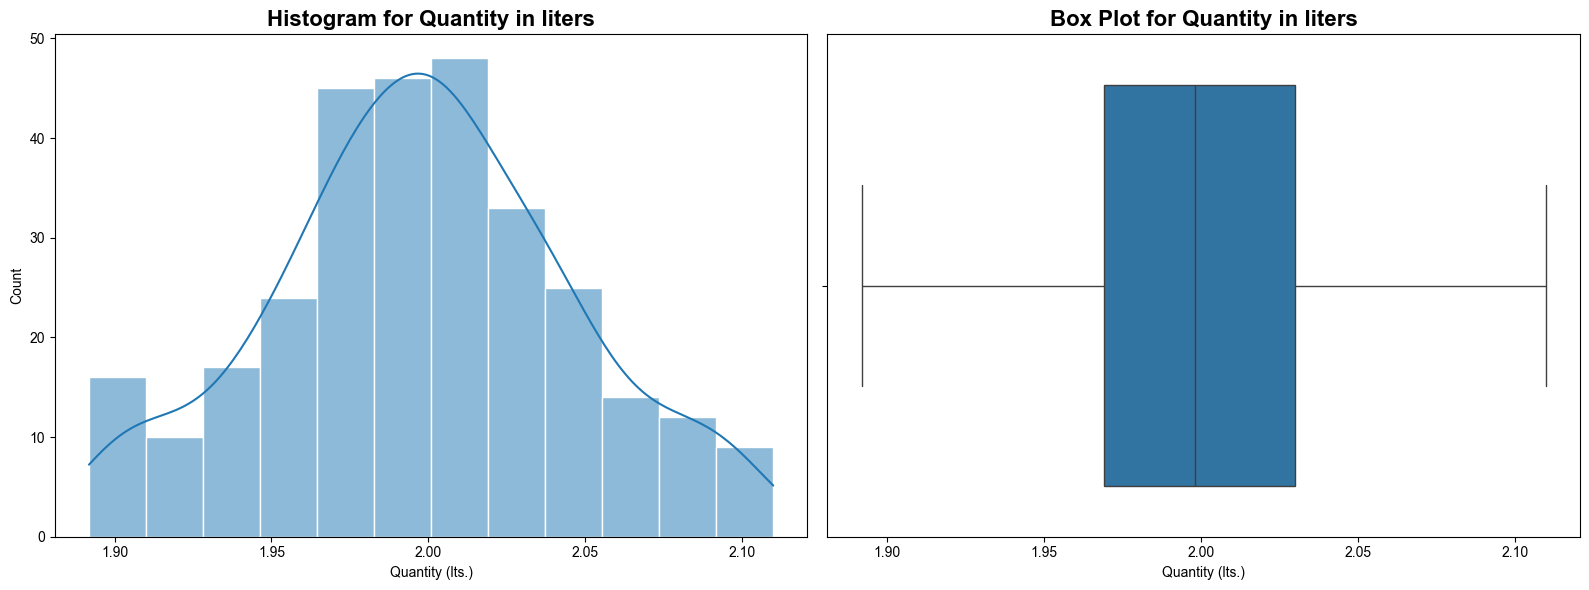

In [14]:
fig, axs = plt.subplots(1, 2, figsize=(16,6))
sns.set_style('darkgrid')

# Distribution plot for Quantity in liters
sns.histplot(data['Quantity (lts.)'], ax=axs[0], kde=True)
axs[0].set_title('Histogram for Quantity in liters', fontsize=16, fontweight='bold')

# Boxplot for Quantity in liters
sns.boxplot(x=data['Quantity (lts.)'], ax=axs[1])
axs[1].set_title('Box Plot for Quantity in liters', fontsize=16, fontweight='bold')

plt.tight_layout()
plt.show()

### Q3. Do we need to treat the outliers in variable CO2 dissolved?

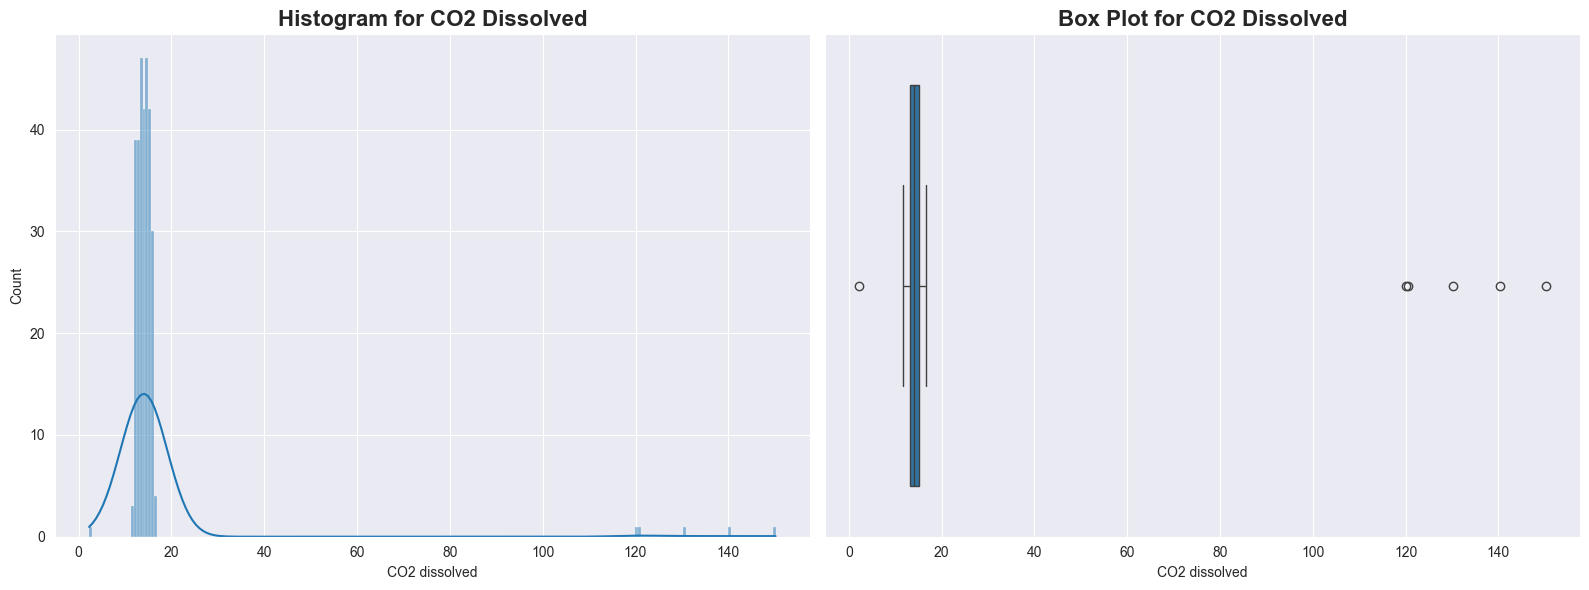


There are some extreme outliers in CO2 dissolved feature. We need treat them


In [15]:
# Create chart for seeing outliers
fig, axs = plt.subplots(1, 2, figsize=(16,6))

# Distribution plot for Quantity in liters
sns.histplot(data['CO2 dissolved'], ax=axs[0], kde=True)
axs[0].set_title('Histogram for CO2 Dissolved', fontsize=16, fontweight='bold')

# Boxplot for Quantity in liters
sns.boxplot(x=data['CO2 dissolved'], ax=axs[1])
axs[1].set_title('Box Plot for CO2 Dissolved', fontsize=16, fontweight='bold')

plt.tight_layout()
plt.show()

print('\nThere are some extreme outliers in CO2 dissolved feature. We need treat them')

### Q4. Identify the correct distribution for the time limit crossed per assembly line.

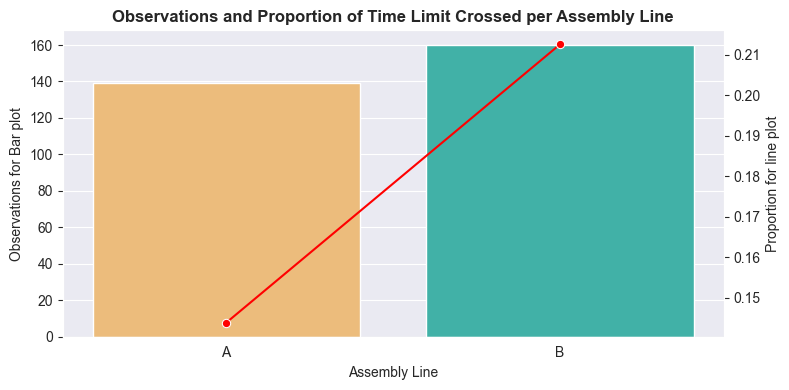

In [16]:
crossed = data.groupby('Assembly Line')['Time limit Crossed'].mean().reset_index()
observations = data['Assembly Line'].value_counts().reset_index().sort_values(by='Assembly Line')

# Create figure and axis objects
fig, ax1 = plt.subplots(figsize=(8, 4))
sns.set_style('dark')

# Bar plot on primary axis
sns.barplot(x='Assembly Line', y='count', data=observations, ax=ax1, hue='Assembly Line', palette=['#ffbf69', '#2ec4b6'])
ax1.set_ylabel('Observations for Bar plot')

# Line plot on secondary axis
ax2 = ax1.twinx()
sns.lineplot(x='Assembly Line', y='Time limit Crossed', data=crossed, ax=ax2, color='red', marker='o')
ax2.set_ylabel('Proportion for line plot')

# Set titles and legends
plt.title('Observations and Proportion of Time Limit Crossed per Assembly Line', fontweight='bold')
ax1.set_xlabel('Assembly Line')

plt.tight_layout()
plt.show()

### Q5. What’s the correlation between CO2 dissolved and Quantity in litres? Round it off to 2 decimal places.

In [17]:
correlation = data[['CO2 dissolved', 'Quantity (lts.)']].corr().loc['CO2 dissolved', 'Quantity (lts.)']
print('Correlation between CO2 dissolved and Quantity in litres is:', round(correlation, 2))

Correlation between CO2 dissolved and Quantity in litres is: 0.05


### Q6. Are almost all the correlations found within the dataframe are insignificant?
##### Show correlation of the data

In [25]:
# Separate numeriacal columns to calculate correlation
numerical_columns = data.select_dtypes(include=['int', 'float']).columns
correlation = data[numerical_columns].corr()
print('Quantity with CO2 dissolved has weak positive relation of 0.05\n\
Quantity with Time limit Crossed have weak negetive relation of -0.03\n\
CO2 dissolved and Time limmit Cross have week negetive relation of -0.06\n\
All the correlation found in the dataframe are very week, so insignificant.')
round(correlation, 2)

Quantity with CO2 dissolved has weak positive relation of 0.05
Quantity with Time limit Crossed have weak negetive relation of -0.03
CO2 dissolved and Time limmit Cross have week negetive relation of -0.06
All the correlation found in the dataframe are very week, so insignificant.


,Id,Quantity (lts.),CO2 dissolved,Time limit Crossed
Id,1.00,0.03,-0.06,-0.09
Quantity (lts.),0.03,1.00,0.05,-0.03
CO2 dissolved,-0.06,0.05,1.00,-0.06
Time limit Crossed,-0.09,-0.03,-0.06,1.00


### Q7. Please select the correct bar plot defining the relationship between Assembly line and CO2 dissolved.

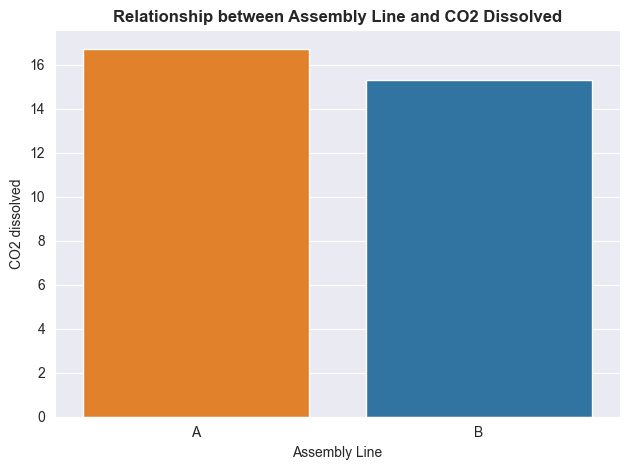

In [35]:
sns.set_style('darkgrid')
sns.barplot(data=data, 
            x='Assembly Line', 
            y='CO2 dissolved', 
            hue='Assembly Line', 
            order=['A', 'B'], 
            errorbar=None)
plt.title('Relationship between Assembly Line and CO2 Dissolved', fontweight='bold')

plt.tight_layout()
plt.show()

### Bivariate analysis

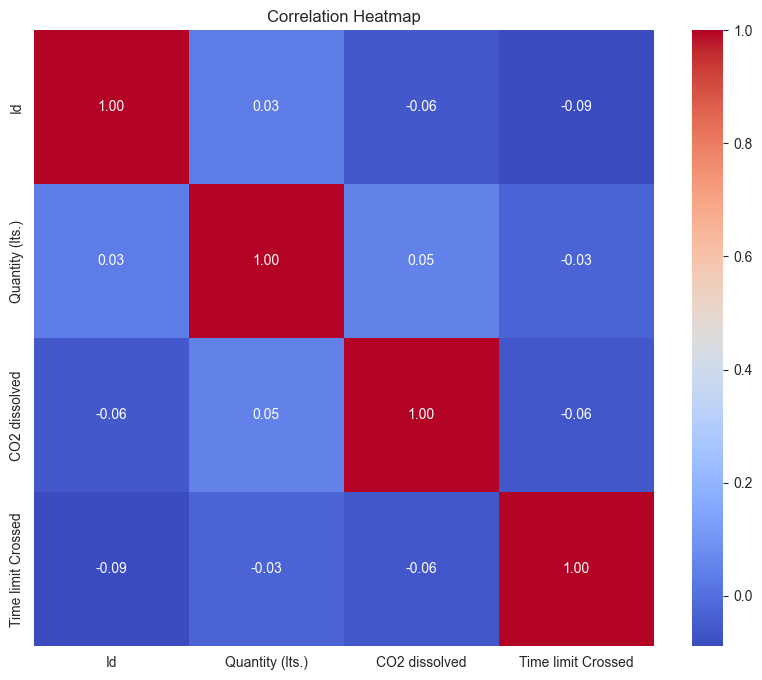

In [46]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

### Challenge! 
Try to perform the analysis of time limit crossed with respect to quantity and CO2 dissolved and see if they seem to pose a problem for higher time limit or not.

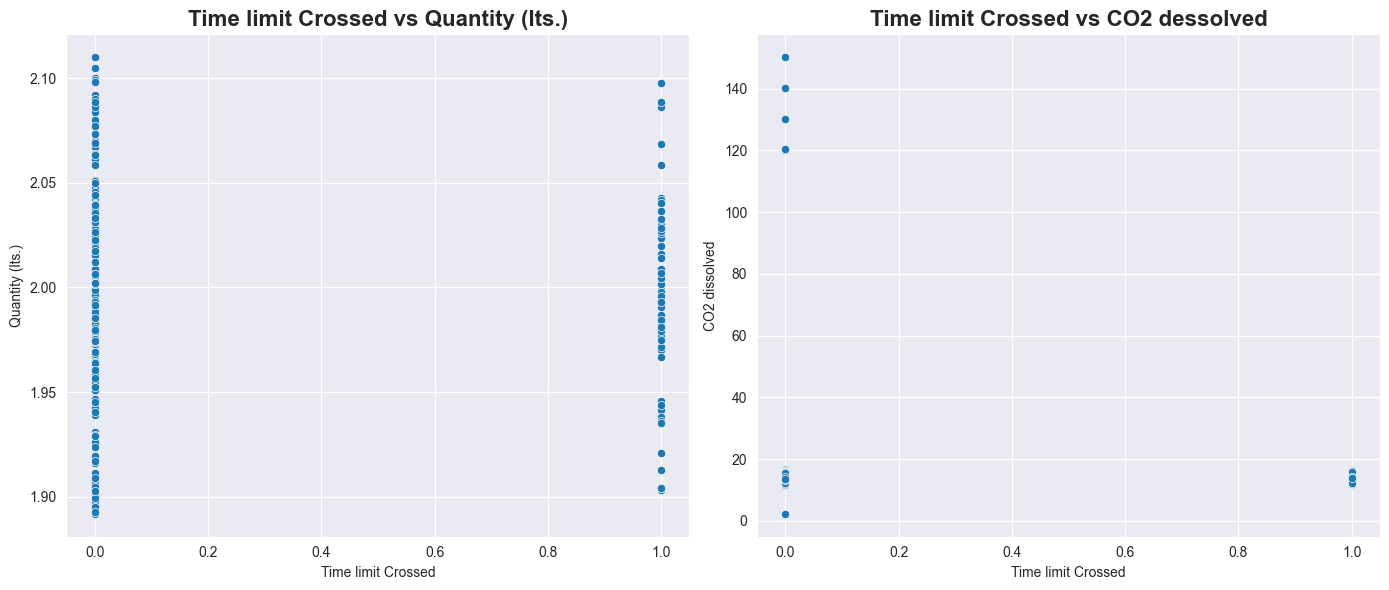

In [62]:
# Create 2 figure
fig, axs = plt.subplots(1,2, figsize=(14,6))

# Create relation chart with Time limit crossed and Quantity
sns.scatterplot(x=data['Time limit Crossed'], y=data['Quantity (lts.)'], ax=axs[0])
axs[0].set_title('Time limit Crossed vs Quantity (lts.)', fontsize=16, fontweight='bold')

# Create relation chart with Time limit crossed and CO2 ressolved
sns.scatterplot(x=data['Time limit Crossed'], y=data['CO2 dissolved'], ax=axs[1])
axs[1].set_title('Time limit Crossed vs CO2 dessolved', fontsize=16, fontweight='bold')

plt.tight_layout()
plt.show()

Here we can easily witness that there aren’t any significant correlations between numerical variables.

### Part 2) Identifying and excluding the outliers!
In our previous section, we have established that there are certain outliers/extremes that exist within the data. In this section, we will closely analyse the outliers and will make a decision if we want to remove/retain them. This step is called treatment of outliers.

Treatment of outliers depends a lot on the context aka domain of the problem. If the outlier is happening because of some measurement error, sampling error, data collection error, etc. then we usually get rid of them but for the rest of the scenarios we keep them as such since they could represent the actual data points.

### Q8.1. Identify the correct upper and lower cut off within CO2 dissolved using IQR rule to exclude the outliers. 
Round off to 2 decimal places.

In [66]:
# We have calculated it before and stored it upper and lower variables
print(f'Lower cut off of CO2 dissolved is: {round(lower, 2)}\n\
Upper cut off of CO2 dissolved is: {round(upper, 2)}')

Lower cut off of CO2 dissolved is: 10.06
Upper cut off of CO2 dissolved is: 18.19


### Q8.2. After treatment with the outliers, what’s the mean value for CO2 dissolved variable?


In [69]:
# Outlier treatment
data['CO2 dissolved'] = np.clip(data['CO2 dissolved'], a_min=lower, a_max=upper)

# Mean after treatment
co2_mean = round(data['CO2 dissolved'].mean(), 2)

print('Mean value for CO2 dissolved after treatment is:', co2_mean)

Mean value for CO2 dissolved after treatment is: 14.1


### Q8.3 Treatment of outliers within CO2 dissolved has an impact on association between CO2 dissolved and Assemble line?

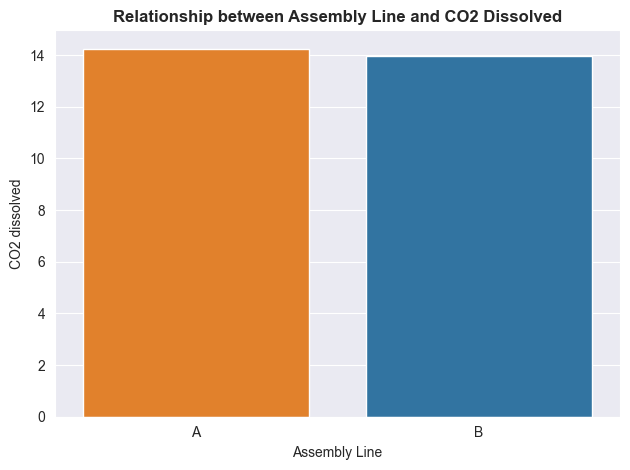

In [71]:
sns.set_style('darkgrid')
sns.barplot(data=data, 
            x='Assembly Line', 
            y='CO2 dissolved', 
            hue='Assembly Line', 
            order=['A', 'B'], 
            errorbar=None)
plt.title('Relationship between Assembly Line and CO2 Dissolved', fontweight='bold')

plt.tight_layout()
plt.show()

Yes there is an impact of treatment outliers on CO2 Dissolved and assembly line feature. in previous chart both A and B Assembly line was above 15 and difference was relatively big between A and B. But after treatment both A and B values of Co2 dissolved decreased to 14 and both are similar now.

### Part 3) Understanding probability distributions and interval estimates
In our current problem, we have been given a sample of ~300 bottles. Let’s understand our Quantity and Time limit crossed variable more closely by understanding their probability distributions and estimate their confidence intervals.

### Q9. Let’s first try to understand the Time limit crossed per assembly line. Please identify the respective probabilities for each assembly line
[Hint: Use value_counts]

In [101]:
tlc_p = round(data.groupby('Assembly Line')['Time limit Crossed'].mean(), 2)

for index, values in tlc_p.items():
    print(f'Probability of {index} is: {values}')

Probability of A is: 0.14
Probability of B is: 0.21


### Q10. Now considering the probabilities calculated in previous questions, Please calculate the probability that 10 bottles crossed the time limit out of a sample of 50 bottles on Assembly line B . Round it off to 2 decimal places.

In [103]:
from scipy.stats import binom

p = tlc_p.get('B')
n = 50
k = 10

prob = round(binom.pmf(k,n,p), 2)

print('Probability of 10 bottles Time limit Crossed in 50 samples  \
of Assembly line B is:', prob)

Probability of 10 bottles Time limit Crossed in 50 samples  of Assembly line B is: 0.14


### Q11. Please calculate the probability that 10 bottles crossed the time limit out of a sample of 50 bottles on Assembly line A. Round it off to 2 decimal places.

In [107]:
from scipy.stats import binom

p = tlc_p.get('A')
n = 50
k = 10

prob = round(binom.pmf(k,n,p), 2)

print('Probability of 10 bottles Time limit Crossed in 50 samples  \
of Assembly line A is:', prob)

Probability of 10 bottles Time limit Crossed in 50 samples  of Assembly line A is: 0.07


### Q12. Please calculate the probability that at least 10 bottles crossed the time limit out of a sample of 50 bottles on Assembly line B . Round it off to 2 decimal places.

In [115]:
p = tlc_p.get('B')
n = 50
k = 10

prob = 1 - round(binom.cdf(k,n,p), 2)
print('Probability of atleast 10 bottles Time limit Crossed in 50 samples  \
of Assembly line B is:', prob)

Probability of atleast 10 bottles Time limit Crossed in 50 samples  of Assembly line B is: 0.49


### Q13. Please calculate the probability that at least 10 bottles crossed the time limit out of a sample of 50 bottles on Assembly line A. Round it off to 2 decimal places.

In [117]:
p = tlc_p.get('A')
n = 50
k = 10

prob = 1 - round(binom.cdf(k,n,p), 2)
print('Probability of atleast 10 bottles Time limit Crossed in 50 samples  \
of Assembly line A is:', round(prob, 2))

Probability of atleast 10 bottles Time limit Crossed in 50 samples  of Assembly line A is: 0.08


By analysing these individual probabilities, we can understand that:
* 1. Out of a randomly selected cohort of bottles, what are the chances of crossing the time limit within individual assembly lines. 
* 2. This clearly indicates we may need to further investigate the root cause of taking higher time on assembly line B compared to A. 


##### In 2 Litre soft drink bottles, the drink filled is close to normally distributed. If bottles contain less than 95% of the listed net content (around 1.90 litres), the manufacturer may be penalised by the state office of consumer affairs. Bottles that have a net quantity above 2.1 litres may cause excess spillage upon opening. Evaluate the following:

### Q14.1. What is the probability that the bottle content can be either penalised or have spillage? 
Round it off to 2 decimal places. [Hint: Use mean and SD for quantity variable after outlier removal]

In [123]:
from scipy.stats import norm

mu = data['Quantity (lts.)'].mean()
sigma = data['Quantity (lts.)'].std()

Prob1  =  norm.cdf(1.9,loc=mu,scale=sigma)
Prob2  =  1 - norm.cdf(2.1,loc=mu,scale=sigma)
prob = round(Prob1 + Prob2, 2)

print('Probability of the bottle content can be penalised or have spillage is:', prob)

Probability of the bottle content can be penalised or have spillage is: 0.04


### Q14.2. What is the probability that the bottle content is in between 1.95 litres and 2.05 litres? 
Round it off to 2 decimal places.

In [124]:
prob1 = norm.cdf(2.05, loc=mu, scale=sigma)
prob2 = norm.cdf(1.95, loc=mu, scale=sigma)
prob = round(prob1 - prob2, 2)
prob

0.7

### Q15. Calculate the 90% interval estimate for the Quantity variable.

In [126]:
lst = data['Quantity (lts.)'].values.tolist()
confidence_level = 0.95
sample_size = len(lst)
standard_error = np.std(lst)
margin_of_error = stats.t.ppf((1 + confidence_level) / 2, df=sample_size - 1) * standard_error
confidence_interval = (np.mean(lst) - margin_of_error, np.mean(lst) + margin_of_error)
print("Confidence Interval (95%) for Quantity:", confidence_interval)

Confidence Interval (95%) for Quantity: (1.9036362540308929, 2.092348047204602)


 Quantity variable is an important factor as established in our previous sections as well. The continuous distribution prospective enlightens us to understand the ranges of probabilities. 

As we can see, we have very low chances of filling the bottle before 1.9 lts. And above 2.1 lts. except a few instances which can be fixed in the later stages. The 90% interval estimates indicate the same theory since most of the values are bound to fall within 1.9-2.1 litres range. (Note: Please be aware that we have performed this analysis as a whole rather than individual assembly lines.)


### Challenge